# D04 CNN 圖形辨識

Yann LeCun 被譽為 Deep Learning 的三巨頭之一。他的 CNN (Convolutional Neural Networks) 是讓 Neural Network 重新受到重視的主因之一。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 讀入套件、準備資料

這裡我們新增一個 `Flatten` layer, 還有 `Conv2D`, `MaxPooling2D`, 使用訓練方式是 `Adadelta`, 這是參考原作的。

[Keras 範例集](https://github.com/fchollet/keras/blob/master/examples)

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adadelta

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

做 CNN 的時候我們可以直接把矩陣塞進去。不過一張彩色的圖通常有 R, G, B 三個矩陣, 但我們這是灰階只有一個。所以 (28, 28) 的矩陣要變成

* channels_last: (28, 28, 1)
* channels_first: (1, 28, 28)

注意很討厭的, 表示法是不一樣的!

In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255
#x_train = x_train.astype("float32")
#x_test = x_test.astype("float32")
#x_train = x_train / 255
#x_test = x_test / 255

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

確定一下一個訓練輸入長什麼樣子。

In [7]:
x_train.shape[1:]

(28, 28, 1)

## 2. 打造 CNN

CNN filter 一般是「越用越多」, 但要幾次 CNN, 是不是每次都要接 MaxPooling 可以自己決定!

In [8]:
model = Sequential()

注意這是 Keras 2 的寫法。我們這裡要用 10 個 3x3 的 filters。

In [9]:
model.add(Conv2D(10, (3, 3), padding='same', input_shape=(28,28,1),
                activation='relu'))

然後每 2x2 的區域做 MaxPooling。

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Conv2D(20, (3, 3), padding='same',
                activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Conv2D(120, (3, 3), padding='same',
                activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

接著要送進一般的神經網路學了, 我們用一個 hidden layer, 200 個神經元。

In [15]:
model.add(Flatten())
model.add(Dense(200, activation='relu'))

最後輸出用 softmax 處理一下。

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adadelta(),
              metrics=['accuracy'])

## 3. 訓練和結果

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 20)        1820      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 120)         21720     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 120)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1080)              0

In [19]:
model.fit(x_train, y_train, batch_size=128, epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 231us/sample - loss: 2.2981 - accuracy: 0.2203
Epoch 2/12
60000/60000 [==============================] - 3s 57us/sample - loss: 2.2904 - accuracy: 0.2890
Epoch 3/12
60000/60000 [==============================] - 3s 56us/sample - loss: 2.2826 - accuracy: 0.3257
Epoch 4/12
60000/60000 [==============================] - 3s 56us/sample - loss: 2.2742 - accuracy: 0.3643
Epoch 5/12
60000/60000 [==============================] - 3s 58us/sample - loss: 2.2645 - accuracy: 0.4177
Epoch 6/12
60000/60000 [==============================] - 3s 58us/sample - loss: 2.2532 - accuracy: 0.4755
Epoch 7/12
60000/60000 [==============================] - 3s 58us/sample - loss: 2.2401 - accuracy: 0.5140
Epoch 8/12
60000/60000 [==============================] - 4s 59us/sample - loss: 2.2247 - accuracy: 0.5430
Epoch 9/12
60000/60000 [==============================] - 3s 57us/sample - loss: 2.2061 - accuracy: 0.5633
Epoch 10/12


## 3. 看最後分數

我們把測試資料結果放 result。

In [20]:
result = model.predict_classes(x_test)

隨便看 25 個數字的結果。

In [21]:
pick = np.random.randint(1,9999, 25)

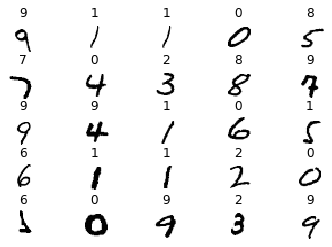

In [23]:
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(result[pick[i]])
    plt.axis("off")

看看分數。

In [24]:
score = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [25]:
loss, acc = score

In [26]:
print(acc)

0.636
